# Compute Baseline for Yearly Aggregated Data

<a id='top'></a>

<a href=#readdata>Read in Data</a>

<a href=#overall_probability>Overall Probability of moving in Dataset</a>

<a href=#prob_company_moves>Probability that Company Moves</a>

<a href=#prob_branch_moves>Probability that Branch Moves</a>

<a href=#plot_probabilities>Plot Probabilities</a>

<a href=#bottom>End of File</a>


In [1]:

import pandas as pd
import gcsfs
from google.cloud import storage
from pandas import DataFrame
from IPython.display import HTML
from google.cloud.storage import Blob
import datalab.storage as gcs_datalab
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns


<a id='readdata'></a>
# Read in data

<a href=#top>Top</a>

In [4]:
# Setting up constants. All required
project = 'graydon-moving-indicator'
bucket_name = 'graydon-data'

# Initializing bucket
fs = gcsfs.GCSFileSystem(project='graydon-moving-indicator')
gcs = storage.Client()
bucket = gcs.get_bucket(bucket_name)


# Setting up dictionary of column types
dtype={ 'id_company'  :np.float64,
        'id_branch'    :np.int64, 
        'code_sbi_2'         : np.float64, 
        'code_sbi_1'          :object, 
        'has_relocated':bool,
        'has_relocated_next_year ' : bool,
        'qty_address_mutations_total' :np.float64,
        #'has_name_change'  :bool,
        'ratio_operating_result_consolidated_operating_result': np.float64,
        'ratio_revenue_consolidated_revenue': np.float64,
        'qty_green_flags'   :np.float64,
        'qty_orange_flags'   :np.float64,
        'qty_red_flags'   :np.float64,
        'A'   :np.float64,
        'AA'   :np.float64,
        'AAA'   :np.float64,
        'B'   :np.float64,
        'BB'   :np.float64,
        'BBB'   :np.float64,
        'C'   :np.float64,
        'CC'   :np.float64,
        'CCC'   :np.float64,
        'D'   :np.float64,
        'NR'   :np.float64,
        'company_age'   :np.float64,
        'years_since_last_amt_consolidated_operating_result'   :np.float64,
        'years_since_last_amt_consolidated_revenue'   :np.float64,
        'years_since_last_amt_operating_result'   :np.float64,
        'years_since_last_qty_employees'   :np.float64,
        'years_since_last_amt_revenue'   :np.float64,
        'delta_qty_employees'   :np.float64,
        'delta_qty_issued_credit_reports'   :np.float64,
        'delta_score_payment_assessment'   :np.float64,
        'delta_score_payment_assessment'   :np.float64,
        'code_legal_form_has_changed ' : bool,
        'is_discontinued_any ' : bool,
        'has_financial_calamity ' : bool,
        'mean_amt_consolidated_operating_result'   :np.float64,
        'mean_amt_consolidated_revenue'   :np.float64,
        'mean_amt_operating_result'   :np.float64,
        'mean_amt_revenue'   :np.float64,
        'mean_qty_employees'   :np.float64,
        'mean_qty_issued_credit_reports'   :np.float64,
        'mean_score_payment_assessment'   :np.float64,
        'mean_score_pd'   :np.float64,
        'qty_address_mutations_year'   :np.float64,
        'qty_started_names_year'   :np.float64,
        'qty_stopped_names_year'   :np.float64,
        'qty_board_changes_year'   :np.float64,
        'variance_qty_issued_credit_reports'   :np.float64,
        'variance_score_payment_assessment'   :np.float64,
        'variance_score_pd'   :np.float64
      }


# Setting up dictionary of column types
parse_dates= ['date_month', 'date_relocation_last', 'date_relocation_penultimate']

def read_one_year_from_bucket_merged_csv(year, dir_prefix = ''):
    """ Reads a whole year of data from the already merged files """
    full_year_df = pd.DataFrame()
    print('Starting with year: ', year)
    print(dir_prefix)
    blob_list = list(bucket.list_blobs(prefix=dir_prefix))    
    for blob in blob_list:  
        print("blob", blob.name)
        if year in blob.name:
            print('Processing file: ', blob.name)
            with fs.open('graydon-data/' + blob.name) as f:
                full_year_df = pd.read_csv(f, sep=',', index_col=0, dtype=dtype, parse_dates=parse_dates)   
        print('The number of rows so far is: ', full_year_df.shape[0])
    return full_year_df


In [5]:
one_year_df = read_one_year_from_bucket_merged_csv(
    dir_prefix= 'including_scores/merged_per_year/aggregated'
                                                   , year = '2017')

Starting with year:  2017
including_scores/merged_per_year/aggregated
blob including_scores/merged_per_year/aggregated/
The number of rows so far is:  0
blob including_scores/merged_per_year/aggregated/2017_merged_cleaned.csv
Processing file:  including_scores/merged_per_year/aggregated/2017_merged_cleaned.csv


/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


The number of rows so far is:  1965800


In [6]:
data_df = one_year_df

In [17]:
data_df.columns

Index(['id_branch', 'date_month', 'id_company', 'code_sbi_2', 'code_sbi_1',
       'qty_address_mutations_total', 'has_relocated', 'has_name_change',
       'date_relocation_last', 'date_relocation_penultimate',
       'ratio_operating_result_consolidated_operating_result',
       'ratio_revenue_consolidated_revenue', 'qty_green_flags',
       'qty_orange_flags', 'qty_red_flags', 'A', 'AA', 'AAA', 'B', 'BB', 'BBB',
       'C', 'CC', 'CCC', 'D', 'NR', 'company_age',
       'years_since_last_amt_consolidated_operating_result',
       'years_since_last_amt_consolidated_revenue',
       'years_since_last_amt_operating_result',
       'years_since_last_qty_employees', 'years_since_last_amt_revenue',
       'delta_qty_employees', 'delta_qty_issued_credit_reports',
       'delta_score_payment_assessment', 'code_legal_form_has_changed',
       'is_discontinued_any', 'has_financial_calamity',
       'mean_amt_consolidated_operating_result',
       'mean_amt_consolidated_revenue', 'mean_amt_oper

<a id='overall_probability'></a>

# Overall Probability that branch moves 

<a href=#top>Top</a>

In [18]:
data_df['has_relocated_next_year'].value_counts()

False    1800347
True       91577
Name: has_relocated_next_year, dtype: int64

In [19]:
data_df['has_relocated_next_year'].value_counts() / data_df.shape[0]

False    0.915834
True     0.046585
Name: has_relocated_next_year, dtype: float64

In [7]:
data_df['has_relocated'].value_counts()

False    1953683
True       12117
Name: has_relocated, dtype: int64

In [8]:
data_df['has_relocated'].value_counts() / data_df.shape[0]

False    0.993836
True     0.006164
Name: has_relocated, dtype: float64

In [9]:
prob_moved = data_df[data_df['has_relocated']==True].shape[0] / data_df.shape[0]

prob_moved

0.006163902736799267

In [20]:
prob_moved = data_df[data_df['has_relocated_next_year']==True].shape[0] / data_df.shape[0]

prob_moved

0.04658510530064096


<a id='prob_company_moves'></a>
# Probability that company moves:

<a href=#top>Top</a>


Calculate the probability that any company has a branch that moves in the dataset.  Companies that have multiple moves do not affect the probability of move.

In [21]:
# Find number of unique companies:
num_unique_companies=data_df['id_company'].nunique()
print("The total number of companies in the dataset is %0.3d" % num_unique_companies) 

The total number of companies in the dataset is 1825709


In [22]:
num_companies_moved = data_df[data_df.has_relocated_next_year==True]['id_company'].nunique()
print("The number of companies involved in a move is %0.3d" % num_companies_moved) 

The number of companies involved in a move is 91065


In [23]:
prob_company_moved = num_companies_moved/ num_unique_companies
print("The probability that a company has a branch that moved is %8.3f %%" % (100*prob_company_moved)) 

The probability that a company has a branch that moved is    4.988 %


<a id='prob_branch_moves'></a>
## Probability that a branch moves:

<a href=#top>Top</a>

In [24]:
num_unique_branches=data_df['id_branch'].nunique()
print("The total number of branches in the dataset is %0.3d" % num_unique_branches) 

The total number of branches in the dataset is 1965800


In [25]:
num_branches_moved = data_df[data_df.has_relocated_next_year==True]['id_branch'].nunique()
print("The number of branches involved in a move is %0.3d" % num_branches_moved) 

The number of branches involved in a move is 91577


In [26]:
prob_branch_moved = num_branches_moved/ num_unique_branches
print("The probability that a branch moved is %8.3f %%" % (100*prob_branch_moved)) 

The probability that a branch moved is    4.659 %


<a id='plot_probabilities'></a>
# Plot Probabilities


<a href=#top>Top</a>

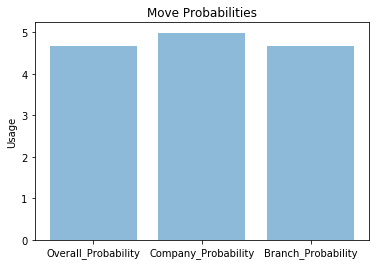

In [27]:
x_labels = ("Overall_Probability", "Company_Probability", "Branch_Probability")
y_pos = np.arange(len(x_labels))
all_probabilities = [prob_moved, prob_company_moved, prob_branch_moved]

all_probabilities = [i * 100 for i in all_probabilities]
 
plt.bar(y_pos, all_probabilities, align='center', alpha=0.5)
plt.xticks(y_pos, x_labels)
plt.ylabel('Usage')
plt.title('Move Probabilities')
 
plt.show()

<a id='bottom'></a>

<a href=#top>Top</a>

# End